# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [8]:
DEVICE = 'cuda:0'
SIGMA=0.006

## Toy generative model

In [9]:
def model(z):
    T = np.array([[1, 1.], [0, 1.], [0, 1.]])
    #n = np.random.randn(3)*sigma
    x = T.dot(z) #+ n
    return x

In [10]:
def noisemodel(x, z = None, noiselevel = 1.):
    n=np.random.randn(3)*SIGMA
    return x+n

## Mock data generation

In [11]:
z0 = np.array([0.4, 0.6])
x0 = noisemodel(model(z0))
print(x0, z0)

[1.00288503 0.60789226 0.60094807] [0.4 0.6]


## Automatic inference 1-dim and 2-dim posteriors

In [12]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None, noisemodel = noisemodel)

In [13]:
#sw.run(nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 2500, nbatch = 32, recycle_net = False, threshold = 1e-8)
sw.run(nworkers=0,nrounds = 4, max_epochs = 20, early_stopping_patience = 3, nsamples = 2500, nbatch = 32, recycle_net = False, threshold = 1e-6)

Adding simulations:   0%|          | 0/2477 [00:00<?, ?it/s]

Adding 2477 new samples.


Adding simulations: 100%|██████████| 2477/2477 [00:00<00:00, 10591.07it/s]


Start training
LR iteration 0
Total epochs: 15
Validation losses: [1.8253291621804237, 1.7402344346046448, 1.4260513205081224, 1.265792589634657, 1.081407392397523, 1.0916578341275454, 1.0540972799062729, 1.272464044392109, 1.064246453344822, 1.0325806979089975, 1.0556762050837278, 0.9593484699726105, 1.1537341699004173, 1.0875545516610146, 1.1210127491503954]
LR iteration 1
Total epochs: 6
Validation losses: [0.8656842857599258, 0.8112478759139776, 0.7968718726187944, 0.8217525668442249, 0.8323332257568836, 0.8488865224644542]
LR iteration 2
Total epochs: 4
Validation losses: [0.7722067655995488, 0.8143074028193951, 0.832001437433064, 0.8452335260808468]


Adding simulations:   0%|          | 0/2429 [00:00<?, ?it/s]

Adding 2429 new samples.


Extracting samples.: 100%|██████████| 4906/4906 [00:00<00:00, 22086.94it/s]


Extracted 4906 samples
Start training
LR iteration 0
Total epochs: 5
Validation losses: [2.1770933121442795, 1.9681662544608116, 2.0565971434116364, 2.0891549214720726, 1.9756291434168816]
LR iteration 1
Total epochs: 7
Validation losses: [1.8536115512251854, 1.895130641758442, 1.798838458955288, 1.7965588048100471, 1.9153571128845215, 1.9635894075036049, 1.845332644879818]
LR iteration 2
Total epochs: 7
Validation losses: [1.8761195465922356, 1.8599459901452065, 1.8900702595710754, 1.767854768782854, 1.8035311251878738, 1.7996854782104492, 1.8034922927618027]


Extracting samples.:  49%|████▊     | 2616/5390 [00:00<00:00, 26157.47it/s]

Adding 484 new samples.


Extracting samples.: 100%|██████████| 5390/5390 [00:00<00:00, 19404.17it/s]


Extracted 5390 samples
Start training
LR iteration 0
Total epochs: 8
Validation losses: [2.4334726780653, 2.242601439356804, 2.2348120883107185, 2.2438469752669334, 2.0615154430270195, 2.109713912010193, 2.291115455329418, 2.2523614913225174]
LR iteration 1
Total epochs: 4
Validation losses: [1.9753080904483795, 2.0232709124684334, 2.005456782877445, 2.080555245280266]
LR iteration 2
Total epochs: 4
Validation losses: [1.9876986145973206, 1.9972547143697739, 2.0753114968538284, 2.108332581818104]


Extracting samples.:  41%|████▏     | 2491/6034 [00:00<00:00, 24900.52it/s]

Adding 644 new samples.


Extracting samples.: 100%|██████████| 6034/6034 [00:00<00:00, 16720.85it/s]


Extracted 6034 samples
Start training
LR iteration 0
Total epochs: 11
Validation losses: [2.4048207327723503, 2.438286393880844, 2.371573880314827, 2.354752741754055, 2.3714731335639954, 2.304369702935219, 2.3825917690992355, 2.196516901254654, 2.2115474864840508, 2.217907316982746, 2.387884259223938]
LR iteration 1
Total epochs: 8
Validation losses: [2.244940236210823, 2.2595634534955025, 2.1335461288690567, 2.1599854975938797, 2.0936575457453728, 2.205629274249077, 2.149632401764393, 2.1085103526711464]
LR iteration 2
Total epochs: 4
Validation losses: [2.094880998134613, 2.1300941109657288, 2.1814348995685577, 2.1087215691804886]


In [14]:
sw.comb([[0, 1]],nworkers=0)

Start training
LR iteration 0
Total epochs: 33
Validation losses: [0.7524486073525622, 0.6625606897287071, 0.7017874647863209, 0.7162805993575603, 0.6314543061889708, 0.640284410212189, 0.5924133255612105, 0.6037867163540795, 0.5325393101666123, 0.6639636306790635, 0.4917780579999089, 0.5107074764091522, 0.46834065252915025, 0.5778510760283098, 0.5821551833068952, 0.5464109856402501, 0.585556240635924, 0.5350447053206153, 0.5994500804226846, 0.6060211119474843, 0.5066419667564332, 0.7990737310610712, 0.6237146221101284, 0.6386836947640404, 0.4944947608746588, 0.6258876264910214, 0.49888563225977123, 0.7651823830674402, 0.6294192086206749, 0.6083831003634259, 0.5362232323968783, 0.6545835732249543, 0.5530861148727126]
LR iteration 1
Total epochs: 26
Validation losses: [0.5026956639485434, 0.5533509691013023, 0.5093719038413838, 0.49836691468954086, 0.4761689613806084, 0.44065953843528405, 0.5299139053095132, 0.47575020138174295, 0.4939065114594996, 0.5777982740546577, 0.522554536932148,

## Plot posteriors

In [15]:
# Fisher analysis
NDIM=2
grad = []
for i in range(0, NDIM):
    dz = np.zeros(NDIM)
    d = 0.001
    dz[i] += d
    g = (model(z0+dz) - model(z0))/d
    grad.append(g)

I = np.zeros((NDIM, NDIM))

for i in range(NDIM):
    for j in range(NDIM):
        I[i, j] = (grad[i]*grad[j]).sum()/SIGMA**2
              
Cov = np.linalg.inv(I)
err = np.diag(Cov)**0.5
print(err)

[0.00734847 0.00424264]


1.0052349106341478 1.8892122715113253
1.0628704609684883 1.9402574490359639


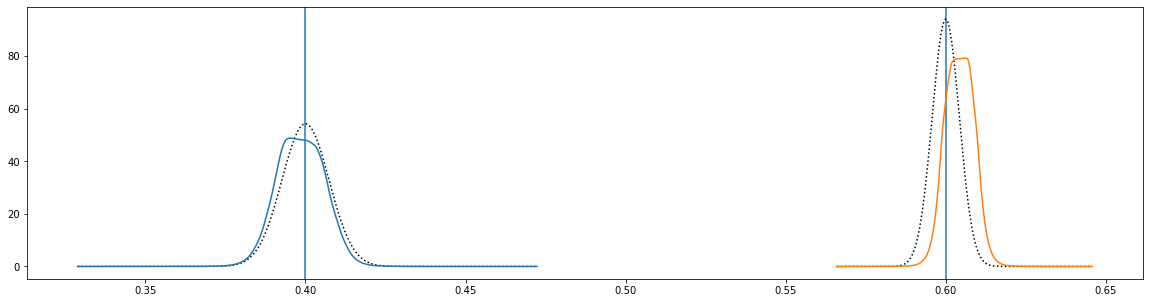

In [16]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.plot(z, stats.norm.pdf(z, z0[i], err[i]), 'k:')
    plt.plot(z, p)
    s = swyft.get_stats(z, p)
    print(s['err68']/err[i], s['err95']/err[i])
#plt.xlim([0.3, 0.7])

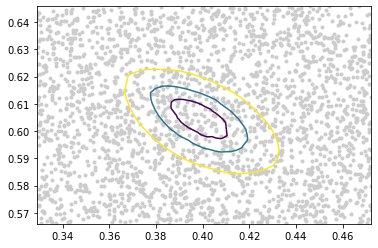

In [18]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])
#plt.xlim([0, 1])
#plt.ylim([0, 1])